In [72]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
import random

C = 2
H = 32
W = 32

In [108]:
def tensor_to_img(tensor):
    return ToPILImage()(tensor)
def display(tensor):
    image = tensor_to_img(tensor)
    plt.imshow(image)
    plt.show()
    
def class_max(tensor):
    channels, height, width = tensor.shape
    output = torch.zeros(1, height, width)
    for row in range(height):
        for col in range(width):
            max_value = 0
            max_channel = None
            for channel in range(channels):
                current_value = tensor[channel, row, col]
                if current_value > max_value:
                    max_value = current_value
                    max_channel = channel
            output[0, row, col] = max_channel
    return output

def binary_class_max(tensor):
    _, height, width = tensor.shape
    output = torch.zeros(1, height, width)
    for row in range(height):
        for col in range(width):
            if tensor[0, row, col] > tensor[1, row, col]:
                output[0, row, col] = 0
            else:
                output[0, row, col] = 1
    return output

sm = nn.Softmax(dim = 0)

Output:  tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 1., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 1.,  ..., 1., 0., 0.],
         [0., 1., 1.,  ..., 0., 1., 0.],
         [1., 1., 0.,  ..., 0., 1., 0.]]])


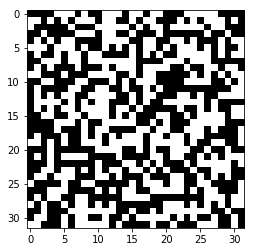

In [110]:
t = [[[random.randint(0, 100) for _ in range(H)] for _ in range(W)]  for _ in range(C)]
t = torch.Tensor(t)

sm_t = sm(t)
output = binary_class_max(sm_t)

print('Output: ', output)
display(output)


